In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 204kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastai
fastai.__version__

from fastai.vision.all import *
from fastai.vision import *

# see matplotlib charts on Jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = 'gdrive/My Drive/'
base_dir = root_dir + 'TrainingSet'
path=Path(base_dir)

Mounted at /content/gdrive


In [ ]:
root_dir = 'C:/'
base_dir = root_dir + 'TrainingSet'
path=Path(base_dir)

In [ ]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize(224,method=ResizeMethod.Squish),
   batch_tfms=aug_transforms())

In [ ]:
dls = fields.dataloaders(path)

In [ ]:
dls.vocab

['0', '1', '10', '100', '101', '103', '104', '105', '106', '107', '108', '11', '110', '111', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '124', '125', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '65', '66', '67', '68', '69', '7', '70', '71', '72', '75', '76', '77', '78', '79', '8', '80', '81', '82', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '97', '98', '99']

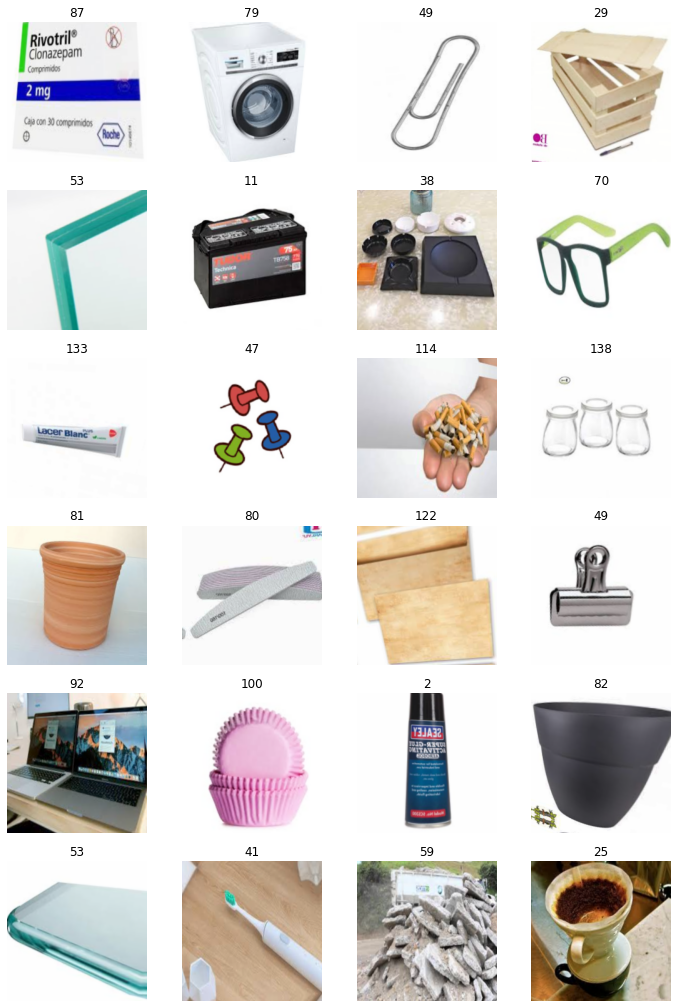

In [ ]:
dls.train.show_batch(max_n=24, nrows=6)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,4.405798,1.608802,0.363565,13:40
1,1.765376,0.701199,0.181392,01:55
2,0.891429,0.608113,0.165754,01:55
3,0.546123,0.549659,0.157154,01:55
4,0.365543,0.528521,0.146208,01:55
5,0.261752,0.463539,0.121970,01:55
6,0.177703,0.459086,0.121188,01:55
7,0.136552,0.452357,0.112588,01:55
8,0.100478,0.446187,0.121188,01:55


KeyboardInterrupt: ignored

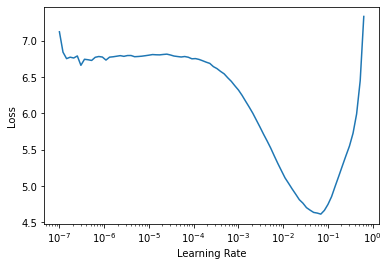

In [ ]:
#learn.unfreeze()
lr_min, lr_steep = learn.lr_find()

In [ ]:
 #https://walkwithfastai.com/Multi_Label

 print(lr_steep)
 
 print(lr_min)

0.005248074419796467
0.006918309628963471


In [ ]:
lr = 1e-2
#learn = learn.to_fp16()

In [ ]:
learn.fit_one_cycle(2, slice(lr))


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.817193,0.997769,0.243159,2:16:10
1,1.019737,0.719988,0.179046,2:17:12


In [ ]:
from fastai.metrics import accuracy_multi

In [ ]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=[accuracy_multi])


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
class BCEWithLogitsLossFlat(BaseLoss):
    "Same as `nn.BCEWithLogitsLoss`, but flattens input and target."
    @use_kwargs_dict(keep=True, weight=None, reduction='mean', pos_weight=None)
    def __init__(self, *args, axis=-1, floatify=True, thresh=0.5, **kwargs):
        if kwargs.get('pos_weight', None) is not None and kwargs.get('flatten', None) is True:
            raise ValueError("`flatten` must be False when using `pos_weight` to avoid a RuntimeError due to shape mismatch")
        if kwargs.get('pos_weight', None) is not None: kwargs['flatten'] = False
        super().__init__(nn.BCEWithLogitsLoss, *args, axis=axis, floatify=floatify, is_2d=False, **kwargs)
        self.thresh = thresh

    def decodes(self, x):    return x>self.thresh
    def activation(self, x): return torch.sigmoid(x)

In [ ]:
learn.loss_func = BCEWithLogitsLossFlat()
learn.lr_find()

ValueError: ignored

In [ ]:
learn.save('res152-movie-stills-after-lr')
learn.export('model.pkl')

NameError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


epoch,train_loss,valid_loss,error_rate,time
0,0.120223,0.160854,0.045833,08:29


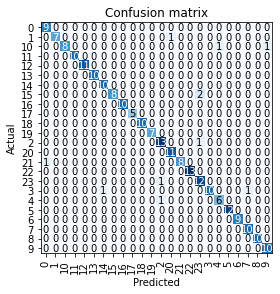

In [ ]:
interp.plot_confusion_matrix()

     |████████████████████████████████| 204kB 8.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
Mounted at /content/gdrive


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.828036,0.980680,0.236904,2:18:30
1,0.832743,0.606809,0.161845,2:28:09


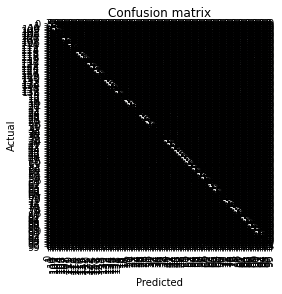

In [ ]:
!pip install fastai --upgrade -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastai
fastai.__version__

from fastai.vision.all import *
from fastai.vision import *

# see matplotlib charts on Jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = 'gdrive/My Drive/'
base_dir = root_dir + 'TrainingSet'
path=Path(base_dir)

fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize(224,method=ResizeMethod.Squish),
   batch_tfms=aug_transforms())

dls = fields.dataloaders(path)

learn = cnn_learner(dls, resnet152, metrics=error_rate)

learn.path = path
lr = 1e-2

learn.fit_one_cycle(2, slice(lr))

learn.save('model2epoches')
learn.export('modelPRO.pkl')

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

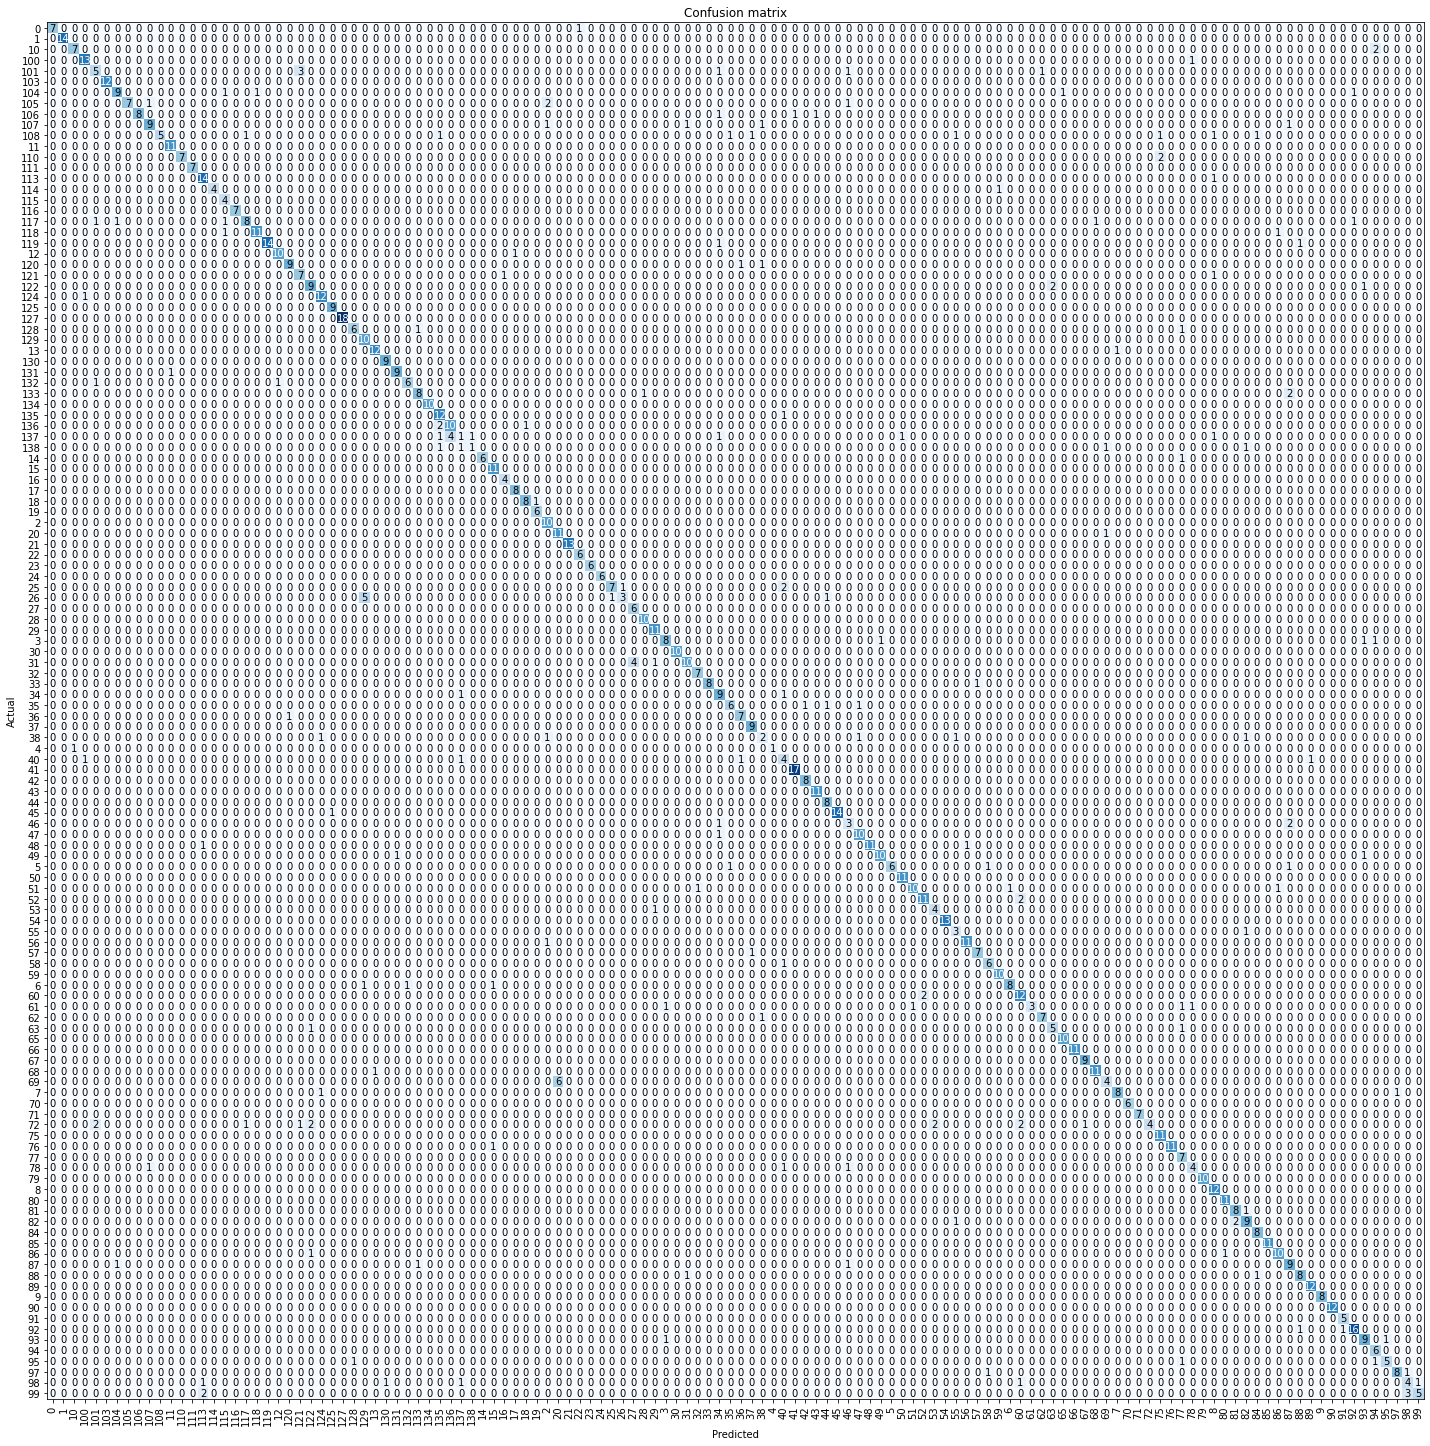

In [ ]:
interp.plot_confusion_matrix(figsize=(20,20))